### Этот анализ затевался изначально просто чтобы посчитать среднюю высоту книги для строительства (очередного) шкафчика.   
Но раз парсить, то парсить всё что можно. Поэтому помимо габаритов книги были собраны еще кое-какие данные.   
Парсера тут нет, датасет уже собран.   
Данные были любезно предоставлены (нет) сайтами магазинов Читай Город и Лабиринт.   
Часть данных используется с одного сайта, часть с другого.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from IPython.display import display, HTML

df2 = pd.read_csv('labirint_dataset.csv', sep=';', encoding='utf-16')
df = pd.read_csv('chitai_gorod_dataset.csv', sep=';', encoding='utf-16')
# df = df.dropna()

print('Количество записей Читай-Город: ', df.shape[0])
print('Количество записей Лабиринт: ', df2.shape[0])

Количество записей Читай-Город:  12355
Количество записей Лабиринт:  50376


Так как записей много и там присутствуют НЕ книги почему-то тоже, то обрезаем аномалии по высоте книги и весу, которые попадают за 99ый и перед 1ый квантилем.
Попадаются всякие адские фолианты или гигантские календари (которые почему-то у читай-города в разделе "книги")

In [2]:
df = df[(df['height'] < df['height'].quantile(.999)) & (df['height'] > df['height'].quantile(.001))]
df = df[(df['weight'] < df['weight'].quantile(.999)) & (df['weight'] > df['weight'].quantile(.001))]

Делим все книги на две категории, ибо как правило в шкафах делают полки двух размеров (те, которые дома а не в библиотеках).
Полки для большинства книг и полки для высоких, больших талмудов, коранов, библий и прочих антропологических атласов и энциклопедий рыбака.

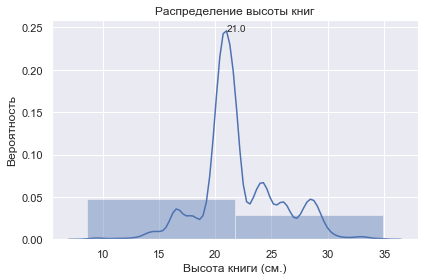

Высота основных полок (плюс зазор 3 см.) =  24.0
Высота дополнительных (высоких) полок (плюс 3 см.) =  37.9
Пропорция количества полок обычные / высокие: 2.5


In [3]:
height = df['height'].dropna()
ax1 = sns.distplot(height, bins=2)
text_y = ax1.get_lines()[0].get_data()[1].max()
text_x = ax1.get_lines()[0].get_data()[0]
text_x = text_x[np.where(ax1.get_lines()[0].get_data()[1] == text_y)][0]
ax1.annotate(s=format(text_x, '.1f'), xy=(text_x, text_y))
plt.xlabel('Высота книги (см.)')
plt.ylabel('Вероятность')
plt.title('Распределение высоты книг')
plt.tight_layout()
plt.show()

print('Высота основных полок (плюс зазор 3 см.) = ', round(text_x + 3, 1))
print('Высота дополнительных (высоких) полок (плюс 3 см.) = ', round((height.max() + 3), 1))
shelves_prop = ax1.patches[1].get_x() / ax1.patches[0].get_x()
print('Пропорция количества полок обычные / высокие: {:.1f}'.format(shelves_prop))

### Анализ издательств.


Самые плодовитые авторы:


author
Трусов И.                            121
Баталина Вера                        113
Узорова Ольга Васильевна             112
Пименова Татьяна                     102
Земцова Ольга Николаевна              88
Пушкин Александр Сергеевич            84
Чуковский Корней Иванович             83
Зверев Сергей Иванович                83
Александрова Наталья Николаевна       81
Тамоников Александр Александрович     78
Жилинская А.                          78
Гришина Анна                          73
Донцова Дарья Аркадьевна              73
Братушева А.                          70
Токарева Елена                        70
Толстой Лев Николаевич                64
Русакова Александра                   64
Маринина Александра                   62
Робертс Нора                          62
Дойл Артур Конан                      61
Name: title, dtype: int64


Топ годов по релизам:


year
2019.0    9174
2020.0    1525
2018.0     472
2017.0     184
2010.0      88
Name: title, dtype: int64


Топ книг по количеству страниц:


,author,title,pages
16659,Протопресвитер Александр Шмеман,"Александр Протопресвитер: ""Я верю"". Что это зн...",11176.0
42586,Сандему Маргит,Маргит Сандему: Люди Льда. Сага. Собрание сочи...,8992.0
15944,Волошин Максимилиан Александрович,Максимилиан Волошин: Собрание сочинений. В 8 т...,8032.0
30232,Цвейг Стефан,Стефан Цвейг: Собрание сочинений в 8-ми томах,4992.0
20975,Захаров Андрей Николаевич,Андрей Захаров: Перекресток времен. Бородатые ...,4480.0



Самые ходовые количества страниц


pages
320.0    2283
16.0     2027
352.0    1633
96.0     1485
128.0    1233
Name: title, dtype: int64

publisher
Эксмо-Пресс    569
АСТ            549
Эксмо          356
Вече            72
Феникс+         53
Name: title, dtype: int64


Самый ленивый издатель (большинство книг с одинаковым количеством страниц):  Эксмо-Пресс

Возрастные рейтинги книг:


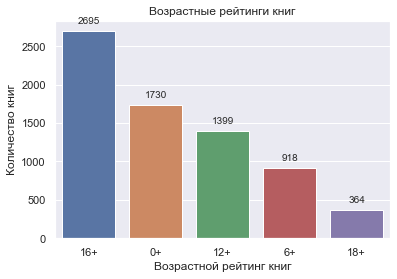

In [11]:
print('\nСамые плодовитые авторы:')
display(df2.groupby(by='author').count()['title'].sort_values(ascending=False).head(20))
print('\nТоп годов по релизам:')
display(df.groupby(by='year').count()['title'].sort_values(ascending=False).head())
print('\nТоп книг по количеству страниц:')
display(df2.sort_values(by='pages', ascending=False)[['author', 'title', 'pages']].head())

pages = df2.groupby(by='pages').count()['title'].sort_values(ascending=False)
print('\nСамые ходовые количества страниц')
display(pages.head())
page_conspiracy = df2[df2['pages'] == pages.index[0]].groupby(by='publisher').count()['title'].sort_values(ascending=False)
print('\n')
display(page_conspiracy.head())
print('\nСамый ленивый издатель (большинство книг с одинаковым количеством страниц): ', page_conspiracy.index[0])

print('\nВозрастные рейтинги книг:')
book_ratings = df.groupby(by='book_pg').count()['title'].sort_values(ascending=False)
# print(book_ratings)
ax = sns.barplot(book_ratings.index, book_ratings.values)
for p in ax.patches:
	ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel('Возрастной рейтинг книг')
plt.ylabel('Количество книг')
plt.title('Возрастные рейтинги книг')
plt.show()

### Анализ цен на книги.

In [5]:
print('\nСамые дорогие книги (топ 10):')
display(df.sort_values(by='price', ascending=False)[['author', 'title', 'price']].head(10))


Самые дорогие книги (топ 10):


,author,title,price
9935,Воробьев В.,Мир спорта - это наш мир,13185
2161,Гауф В.,Калиф - аист,8250
1199,Калдер Н.,Руководство по механическим и электрическим си...,7920
1200,Калдер Н.,Руководство по механическим и электрическим си...,7920
2162,Андерсен Х.,Дюймовочка,7800
2155,Гауф В.,Холодное сердце,7800
2160,Андерсен Х.,Принцесса на горошине,7800
2159,Андерсен Х.,Русалочка,7800
2158,Королев И. (пер.),Синдбад–мореход,7800
2157,Андерсен Х.,Снежная королева,7800


#### Посмотрим как зависит стоймость книги от её веса (очевидно что весьма прямая зависимость)
Обучаем линейный регрессор:

Минимальная цена книги = 15.0
Если бы продавали на вес, то 1 гр. книг стоил бы = 1.4 руб.


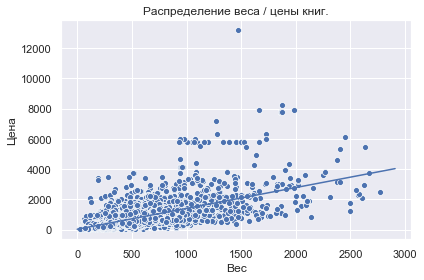

In [6]:
model = LinearRegression(fit_intercept=True)
X = df['weight'].to_numpy()[:, np.newaxis]
y = df['price'].to_numpy()
model.fit(X, y)
# print(model.coef_, model.intercept_)
xfit = np.linspace(0, X.max() * 1.05)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
print('Минимальная цена книги = {:.1f}'.format(y.min()))
print('Если бы продавали на вес, то 1 гр. книг стоил бы = {:.1f} руб.'.format(model.coef_[0]))

sns.scatterplot(x='weight', y='price', data=df)
sns.lineplot(x=xfit, y=yfit)
plt.xlabel('Вес')
plt.ylabel('Цена')
plt.title('Распределение веса / цены книг.')
plt.tight_layout()
plt.show()

Распределение цен на книги в общем.
Отмечена самая распространенная цена.

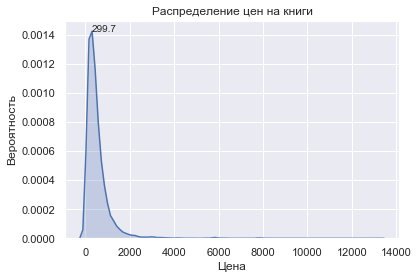

Самая популярная цена (+-) = 299.75
Медианная цена =  380.0
Средняя цена =  524.21


In [10]:
prices = df['price'].to_numpy()
ax1 = sns.kdeplot(prices, shade=True)
text_y = ax1.get_lines()[0].get_data()[1].max()
text_x = ax1.get_lines()[0].get_data()[0]
text_x = text_x[np.where(ax1.get_lines()[0].get_data()[1] == text_y)][0]
ax1.annotate(s=format(text_x, '.1f'), xy=(text_x, text_y))
plt.xlabel('Цена')
plt.ylabel('Вероятность')
plt.title('Распределение цен на книги')
plt.show()
print('Самая популярная цена (+-) = {:.2f}'.format(text_x))
print('Медианная цена = ', np.median(prices))
print('Средняя цена = ', format(np.mean(prices), '.2f'))